# Pre Placement Project

In [2]:
import statistics as st
import pandas as pd
from scipy.stats import skew
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

# Data Cleaning and Preparation:

In [184]:
data = pd.read_excel('airline_dataset.xlsx')

In [185]:
data

,flight,flight_code,cust_id,cust_name,city,neighbourhood,latitude,longitude,stay_type,stay_price,...,month,day,sched_dep_time,dep_time,dep_delay_min,sched_arr_time,arr_time,arr_delay_min,air_time_min,distance
0,1545,N14228,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,...,1,1,05:15:00,05:17:00,2.0,08:19:00,08:30:00,11.0,227.0,1400
1,1714,N24211,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,...,1,1,05:29:00,05:33:00,4.0,08:30:00,08:50:00,20.0,227.0,1416
2,1141,N619AA,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,...,1,1,05:40:00,05:42:00,2.0,08:50:00,09:23:00,33.0,160.0,1089
3,725,N804JB,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,...,1,1,05:45:00,05:44:00,-1.0,10:22:00,10:04:00,-18.0,183.0,1576
4,461,N668DN,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,...,1,1,06:00:00,05:54:00,-6.0,08:37:00,08:12:00,-25.0,116.0,762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48879,1401,N595JB,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,...,12,24,12:32:00,12:32:00,0.0,15:30:00,15:37:00,7.0,165.0,1069
48880,4141,N11121,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,...,12,24,12:39:00,12:32:00,-7.0,15:10:00,15:13:00,3.0,130.0,746
48881,3616,N797MX,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,...,12,24,12:45:00,12:38:00,-7.0,15:40:00,15:37:00,-3.0,217.0,1411
48882,300,N4YUAA,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,...,12,24,12:40:00,12:38:00,-2.0,15:20:00,15:13:00,-7.0,201.0,1372


# Getting datatypes

In [5]:
info = data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48884 entries, 0 to 48883
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   flight                     48884 non-null  int64  
 1   flight_code                48884 non-null  object 
 2   cust_id                    48884 non-null  int64  
 3   cust_name                  48862 non-null  object 
 4   city                       48884 non-null  object 
 5   neighbourhood              48884 non-null  object 
 6   latitude                   48884 non-null  float64
 7   longitude                  48884 non-null  float64
 8   stay_type                  48884 non-null  object 
 9   stay_price                 48884 non-null  int64  
 10  flight_price               48884 non-null  int64  
 11  night_flight               48884 non-null  int64  
 12  total_number_travel        48884 non-null  int64  
 13  total_cust_listings_count  48884 non-null  int

# Checking for Missing Values

In [6]:
missing_values = data.isnull().sum()

print("\nCount of Missing Values for Each Column:")
print(missing_values)


Count of Missing Values for Each Column:
flight                         0
flight_code                    0
cust_id                        0
cust_name                     22
city                           0
neighbourhood                  0
latitude                       0
longitude                      0
stay_type                      0
stay_price                     0
flight_price                   0
night_flight                   0
total_number_travel            0
total_cust_listings_count      0
availability_365               0
year                           0
month                          0
day                            0
sched_dep_time                 0
dep_time                     713
dep_delay_min                713
sched_arr_time                 0
arr_time                     735
arr_delay_min                822
air_time_min                 822
distance                       0
dtype: int64


# Updating & Removing null values

In [7]:
categorical_col = 'cust_name'
if data[categorical_col].isnull().any():
    mode_value = data[categorical_col].mode()[0]
    data[categorical_col].fillna(mode_value, inplace=True)

In [8]:
data.dropna(inplace=True)

In [9]:
missing_values = data.isnull().sum()

print("\nCount of Missing Values for Each Column:")
print(missing_values)


Count of Missing Values for Each Column:
flight                       0
flight_code                  0
cust_id                      0
cust_name                    0
city                         0
neighbourhood                0
latitude                     0
longitude                    0
stay_type                    0
stay_price                   0
flight_price                 0
night_flight                 0
total_number_travel          0
total_cust_listings_count    0
availability_365             0
year                         0
month                        0
day                          0
sched_dep_time               0
dep_time                     0
dep_delay_min                0
sched_arr_time               0
arr_time                     0
arr_delay_min                0
air_time_min                 0
distance                     0
dtype: int64


# Checking for Duplicates

In [65]:
df1 = data.drop(columns=['cust_id','flight_code','latitude','longitude'])

df_dup = df1[df1.duplicated(keep='first')]

print("\nDuplicate Rows based on all columns except 'cust_id':")
df_dup


Duplicate Rows based on all columns except 'cust_id':


,flight,cust_name,city,neighbourhood,stay_type,stay_price,flight_price,night_flight,total_number_travel,total_cust_listings_count,...,month,day,sched_dep_time,dep_time,dep_delay_min,sched_arr_time,arr_time,arr_delay_min,air_time_min,distance


In [66]:
df_dup = data[data.duplicated(keep='first')]

print("\nDuplicate Rows based on all columns except 'cust_id':")
df_dup


Duplicate Rows based on all columns except 'cust_id':


,flight,flight_code,cust_id,cust_name,city,neighbourhood,latitude,longitude,stay_type,stay_price,...,month,day,sched_dep_time,dep_time,dep_delay_min,sched_arr_time,arr_time,arr_delay_min,air_time_min,distance


In [21]:
data.columns

Index(['flight', 'flight_code', 'cust_id', 'cust_name', 'city',
       'neighbourhood', 'latitude', 'longitude', 'stay_type', 'stay_price',
       'flight_price', 'night_flight', 'total_number_travel',
       'total_cust_listings_count', 'availability_365', 'year', 'month', 'day',
       'sched_dep_time', 'dep_time', 'dep_delay_min', 'sched_arr_time',
       'arr_time', 'arr_delay_min', 'air_time_min', 'distance'],
      dtype='object')

#  Connecting to SQL & Updating data

In [54]:
import mysql.connector as sql
db = sql.connect(host='localhost', user='root',password='Sachinpaaapa1')
mycursor = db.cursor()
mycursor.execute("show databases")
for i in mycursor:
    print(i)

('hr',)
('information_schema',)
('mysql',)
('performance_schema',)
('sys',)
('world',)


In [55]:
mycursor.execute ("Create database if not exists airline_data")

In [56]:
from sqlalchemy import create_engine

In [57]:
engine = create_engine("mysql+pymysql://{user}:{pw}@{host}/{db}"
.format(host='localhost', db='airline_data', user='root', pw='Sachinpaaapa1'))

In [59]:
mycursor.execute ("use airline_data")

# Creating fight details table

In [32]:
flights_details = pd.DataFrame(data, columns=['flight', 'flight_code', 'sched_dep_time', 'dep_time', 'dep_delay_min',
                                         'sched_arr_time', 'arr_time', 'arr_delay_min', 'air_time_min', 'distance'])

In [38]:
flights_details.head()

,flight,flight_code,sched_dep_time,dep_time,dep_delay_min,sched_arr_time,arr_time,arr_delay_min,air_time_min,distance
0,1545,N14228,05:15:00,05:17:00,2.0,08:19:00,08:30:00,11.0,227.0,1400
1,1714,N24211,05:29:00,05:33:00,4.0,08:30:00,08:50:00,20.0,227.0,1416
2,1141,N619AA,05:40:00,05:42:00,2.0,08:50:00,09:23:00,33.0,160.0,1089
3,725,N804JB,05:45:00,05:44:00,-1.0,10:22:00,10:04:00,-18.0,183.0,1576
4,461,N668DN,06:00:00,05:54:00,-6.0,08:37:00,08:12:00,-25.0,116.0,762


In [60]:
try:
    data.to_sql('flights_details', engine, if_exists='replace', index=False)
    print("Table updated successfully.")
except Exception as e:
    print("Error occurred:", e)

Table updated successfully.


# Creating Customer details table

In [34]:
customers_details = pd.DataFrame(data, columns=['cust_id', 'cust_name', 'city', 'neighbourhood', 'latitude', 'longitude'])

In [41]:
customers_details.head()

,cust_id,cust_name,city,neighbourhood,latitude,longitude
0,2787,John,Brooklyn,Kensington,40.64749,-73.97237
1,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377
2,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190
3,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976
4,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399


In [61]:
try:
    data.to_sql('customers_details', engine, if_exists='replace', index=False)
    print("Table updated successfully.")
except Exception as e:
    print("Error occurred:", e)

Table updated successfully.


# Creating booking details table

In [36]:
bookings_details = pd.DataFrame(data, columns=['flight', 'flight_code', 'cust_id', 'stay_type', 'stay_price', 'flight_price',
                                          'night_flight', 'total_number_travel', 'total_cust_listings_count',
                                          'availability_365', 'year', 'month', 'day'])

In [40]:
bookings_details.head()

,flight,flight_code,cust_id,stay_type,stay_price,flight_price,night_flight,total_number_travel,total_cust_listings_count,availability_365,year,month,day
0,1545,N14228,2787,Private room,149,714,1,9,6,365,2013,1,1
1,1714,N24211,2845,Entire home/apt,225,1079,1,45,2,355,2013,1,1
2,1141,N619AA,4632,Private room,150,719,3,2,1,365,2013,1,1
3,725,N804JB,4869,Entire home/apt,89,427,1,270,1,194,2013,1,1
4,461,N668DN,7192,Entire home/apt,80,384,10,9,1,0,2013,1,1


In [62]:
try:
    data.to_sql('bookings_details', engine, if_exists='replace', index=False)
    print("Table updated successfully.")
except Exception as e:
    print("Error occurred:", e)

Table updated successfully.


In [81]:
data.columns

Index(['flight', 'flight_code', 'cust_id', 'cust_name', 'city',
       'neighbourhood', 'latitude', 'longitude', 'stay_type', 'stay_price',
       'flight_price', 'night_flight', 'total_number_travel',
       'total_cust_listings_count', 'availability_365', 'year', 'month', 'day',
       'sched_dep_time', 'dep_time', 'dep_delay_min', 'sched_arr_time',
       'arr_time', 'arr_delay_min', 'air_time_min', 'distance'],
      dtype='object')

# 

# EDA

In [107]:
def identify_data_types(data):
    categorical = []
    numerical = []
    
    for column in data.columns:
        if data[column].dtype == 'object':   
            categorical.append(column)
        else:
            numerical.append(column)
    
    return categorical, numerical

categorical_columns, numerical_columns = identify_data_types(data)


print("Categorical Columns:", categorical_columns)
print("Numerical Columns:", numerical_columns)

Categorical Columns: ['flight_code', 'cust_name', 'city', 'neighbourhood', 'stay_type', 'sched_dep_time', 'dep_time', 'sched_arr_time', 'arr_time']
Numerical Columns: ['flight', 'cust_id', 'latitude', 'longitude', 'stay_price', 'flight_price', 'night_flight', 'total_number_travel', 'total_cust_listings_count', 'availability_365', 'year', 'month', 'day', 'dep_delay_min', 'arr_delay_min', 'air_time_min', 'distance']


In [108]:
from tabulate import tabulate
table = [categorical_columns, numerical_columns]
print(tabulate({"Categorical":categorical_columns,
                "Numerical": numerical_columns}, headers = ["Categorical", "Numerical"]))

Categorical     Numerical
--------------  -------------------------
flight_code     flight
cust_name       cust_id
city            latitude
neighbourhood   longitude
stay_type       stay_price
sched_dep_time  flight_price
dep_time        night_flight
sched_arr_time  total_number_travel
arr_time        total_cust_listings_count
                availability_365
                year
                month
                day
                dep_delay_min
                arr_delay_min
                air_time_min
                distance


# 

# Univariate Analysis:


# 1.Flight Prices: 

   a. What is the distribution of flight prices? Are there any outliers or patterns in the pricing data?
   
   b. What is the average, minimum, and maximum flight price?


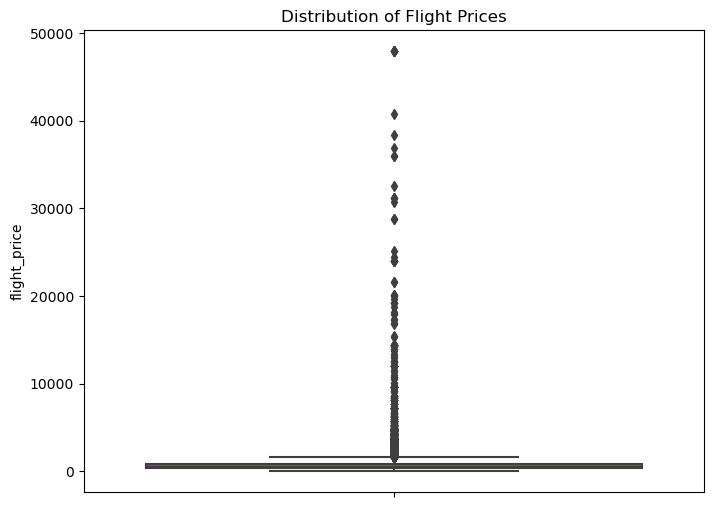

Flight Price Statistics:


count    48062.000000
mean       732.910262
std       1151.201160
min          0.000000
25%        331.000000
50%        510.500000
75%        839.000000
max      47953.000000
Name: flight_price, dtype: float64

In [115]:
# Distribution of flight prices and checking for outliers
plt.figure(figsize=(8, 6))
sns.boxplot(y='flight_price', data=data)
plt.title('Distribution of Flight Prices')
plt.show()

# Summary statistics of flight prices
flight_price_stats = data['flight_price'].describe()

print("Flight Price Statistics:")
flight_price_stats


# 2. **Stay Prices:**
   a. How are stay prices distributed across different types of stay?

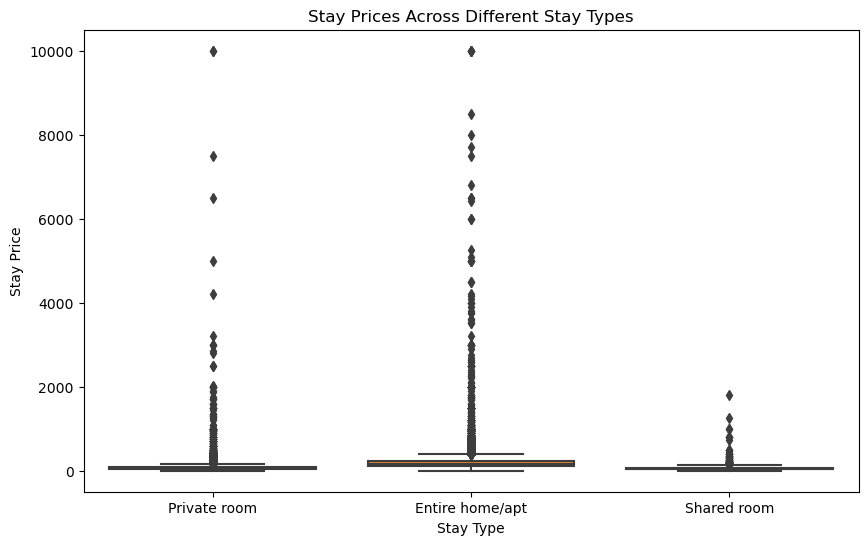

In [125]:
# Distribution of stay prices across different stay types
plt.figure(figsize=(10, 6))
sns.boxplot(x='stay_type', y='stay_price', data=data)
plt.title('Stay Prices Across Different Stay Types')
plt.xlabel('Stay Type')
plt.ylabel('Stay Price')
plt.show()

# 3. Flight Delays:

   a.  distribution of departure delays (dep_delay) 
   
   b. distribution of arrival delays (arr_delay) 


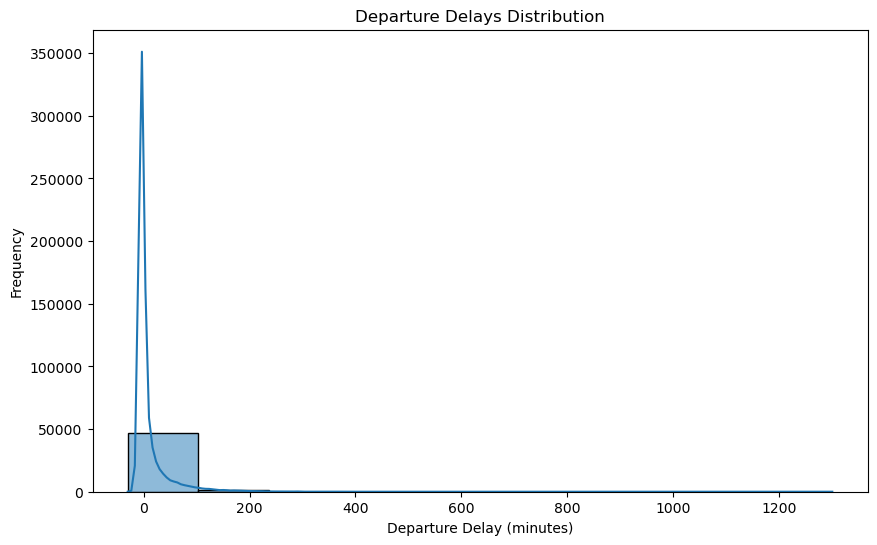

In [135]:

# Distribution of departure delays
plt.figure(figsize=(10, 6))
sns.histplot(data['dep_delay_min'], bins=10, kde=True)
plt.title('Departure Delays Distribution')
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Frequency')
plt.show()


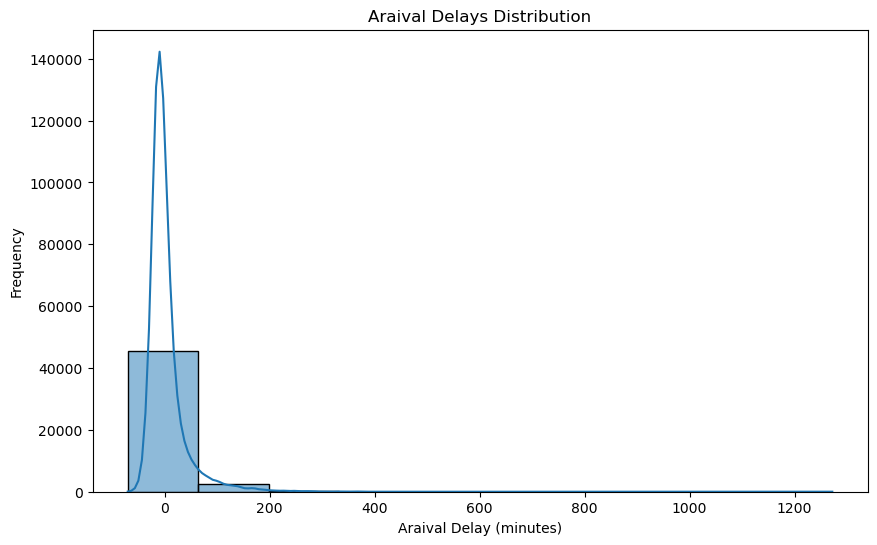

In [134]:

# Distribution of araival delays
plt.figure(figsize=(10, 6))
sns.histplot(data['arr_delay_min'], bins=10, kde=True)
plt.title('Araival Delays Distribution')
plt.xlabel('Araival Delay (minutes)')
plt.ylabel('Frequency')
plt.show()


# 

# Bivariate Analysis:

# correlation between flight prices and stay prices

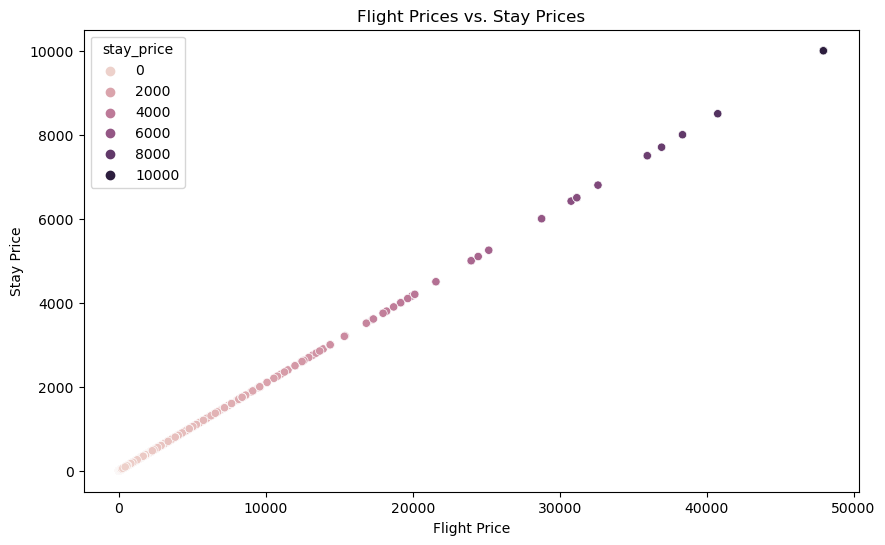

In [154]:


# Scatter plot to analyze the correlation between flight prices and stay prices based on neighborhoods
plt.figure(figsize=(10, 6))
sns.scatterplot(x='flight_price', y='stay_price', hue='stay_price', data=data)
plt.title('Flight Prices vs. Stay Prices')
plt.xlabel('Flight Price')
plt.ylabel('Stay Price')
plt.show()


# flight prices based on stay types

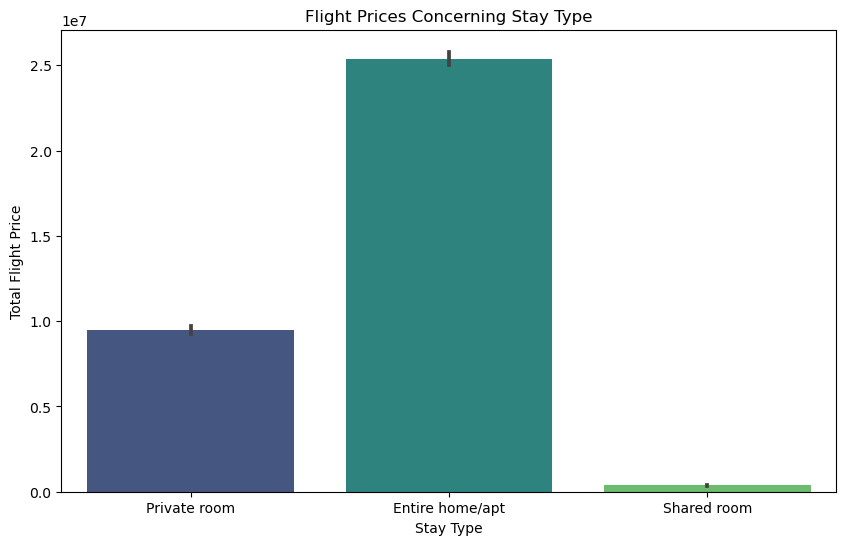

In [172]:


# Bar chart to analyze flight prices based on stay types
plt.figure(figsize=(10, 6))
sns.barplot(x='stay_type', y='flight_price', data=data, estimator=sum, palette='viridis')
plt.title('Flight Prices Concerning Stay Type')
plt.xlabel('Stay Type')
plt.ylabel('Total Flight Price')
plt.xticks(rotation=0)
plt.show()


# City vs. Average Departure Delay

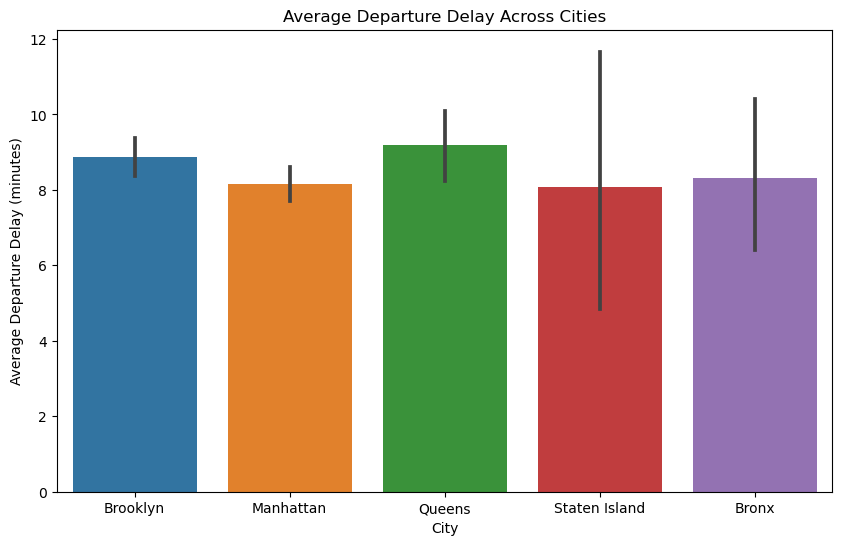

In [171]:
plt.figure(figsize=(10, 6))
sns.barplot(x='city', y='dep_delay_min', data=data)
plt.title('Average Departure Delay Across Cities')
plt.xlabel('City')
plt.ylabel('Average Departure Delay (minutes)')
plt.xticks(rotation=0)
plt.show()


# Month vs. Total Customer Count

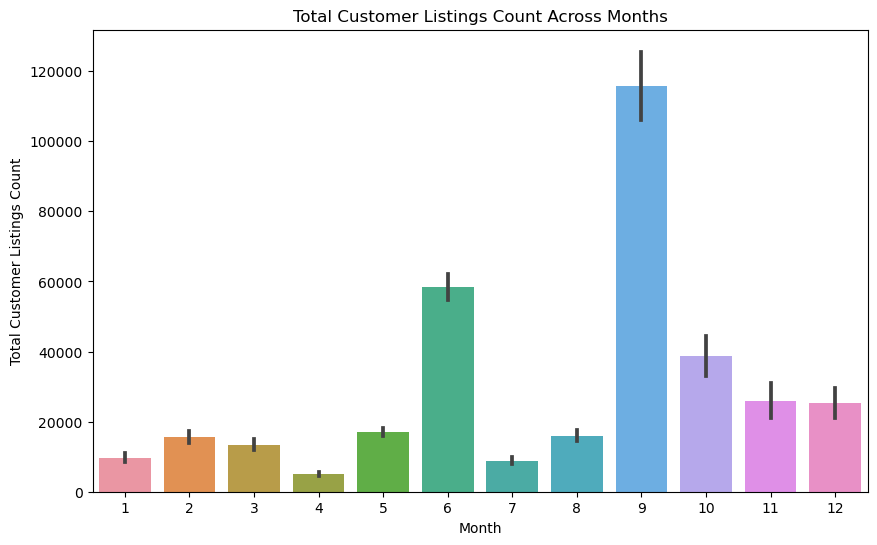

In [186]:
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='total_cust_listings_count', data=data, estimator=sum)
plt.title('Total Customer Listings Count Across Months')
plt.xlabel('Month')
plt.ylabel('Total Customer Listings Count')
plt.show()

# City vs. Average Departure Delay

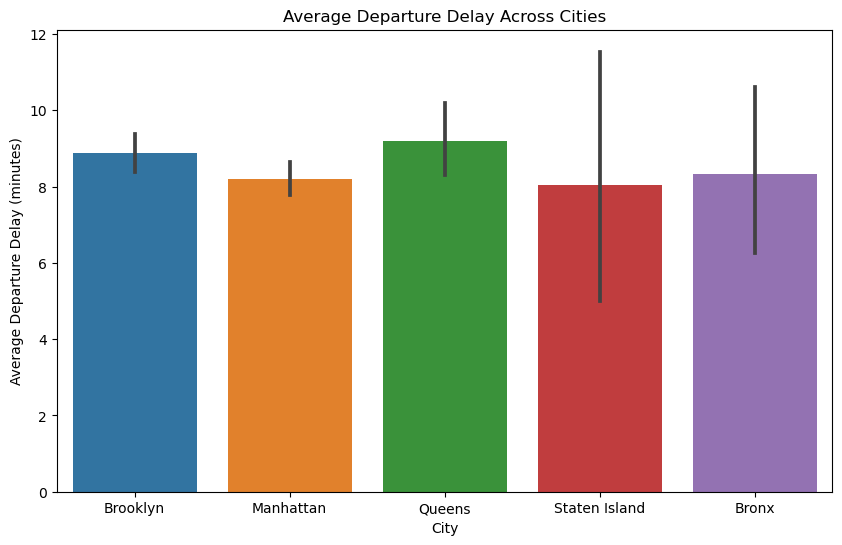

In [191]:
plt.figure(figsize=(10, 6))
sns.barplot(x='city', y='dep_delay_min', data=data, estimator='mean')
plt.title('Average Departure Delay Across Cities')
plt.xlabel('City')
plt.ylabel('Average Departure Delay (minutes)')
plt.xticks(rotation=0)
plt.show()


# Total Number of Travelers vs. Departure Delay

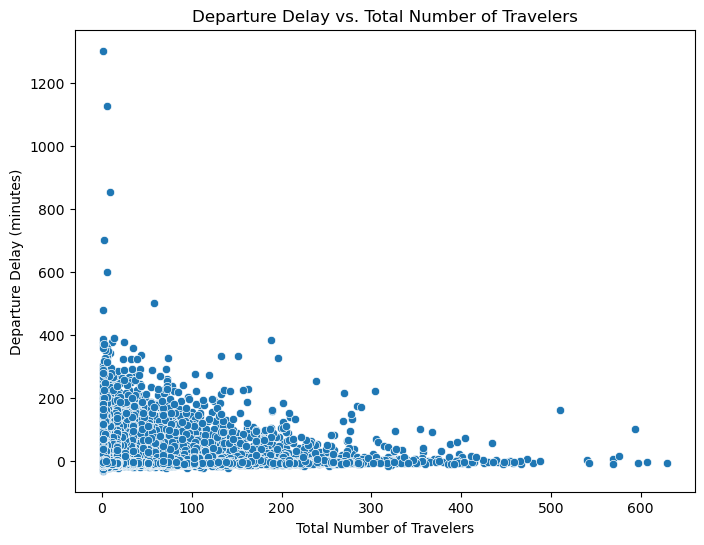

In [193]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_number_travel', y='dep_delay_min', data=data)
plt.title('Departure Delay vs. Total Number of Travelers')
plt.xlabel('Total Number of Travelers')
plt.ylabel('Departure Delay (minutes)')
plt.show()

# 

# Multivariate Analysis:

# Correlation Heatmap

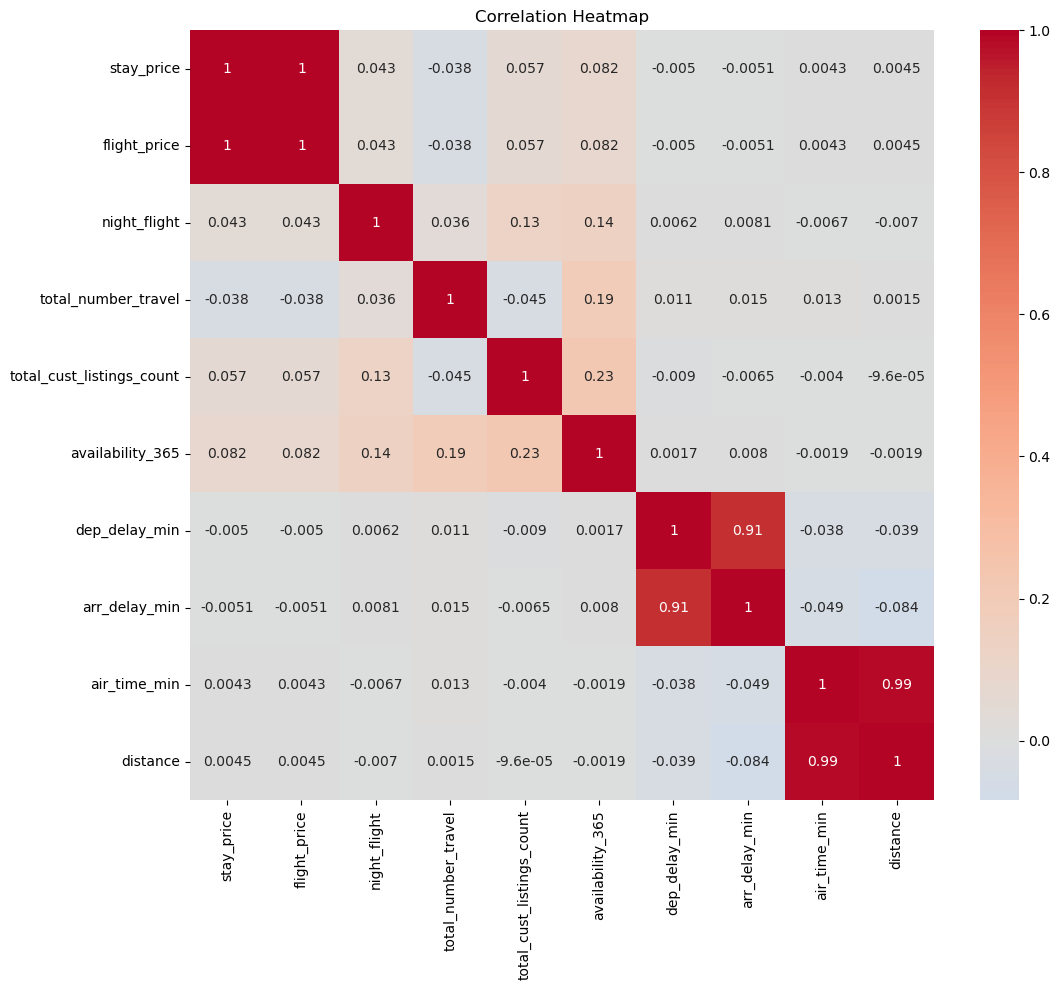

In [195]:
import seaborn as sns
plt.figure(figsize=(12, 10))
correlation_matrix = data[['stay_price', 'flight_price', 'night_flight', 'total_number_travel', 'total_cust_listings_count',
                        'availability_365', 'dep_delay_min', 'arr_delay_min', 'air_time_min', 'distance']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()


# distribution of departure delays across different cities and stay types

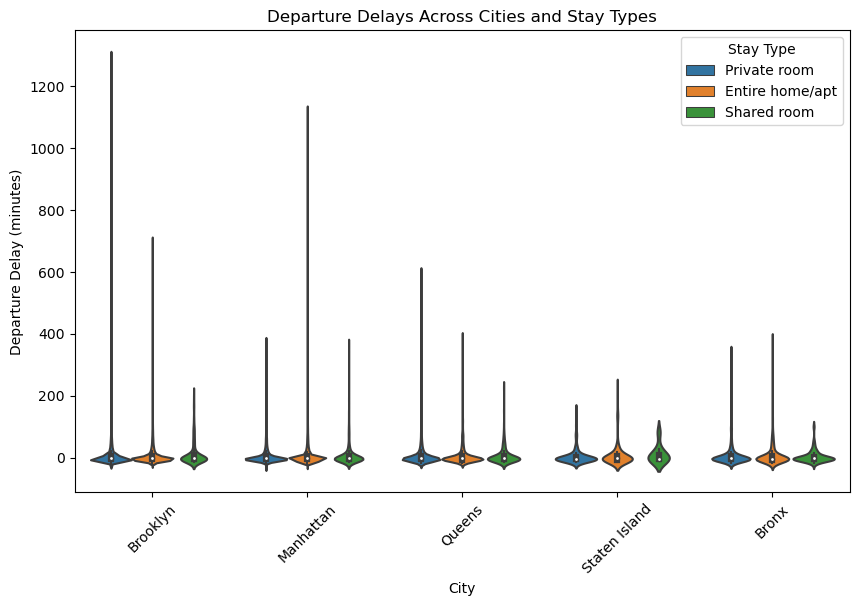

In [199]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='city', y='dep_delay_min', hue='stay_type', data=data)
plt.title('Departure Delays Across Cities and Stay Types')
plt.xlabel('City')
plt.ylabel('Departure Delay (minutes)')
plt.legend(title='Stay Type')
plt.xticks(rotation=45)
plt.show()


# Demand Analysis Across Cities

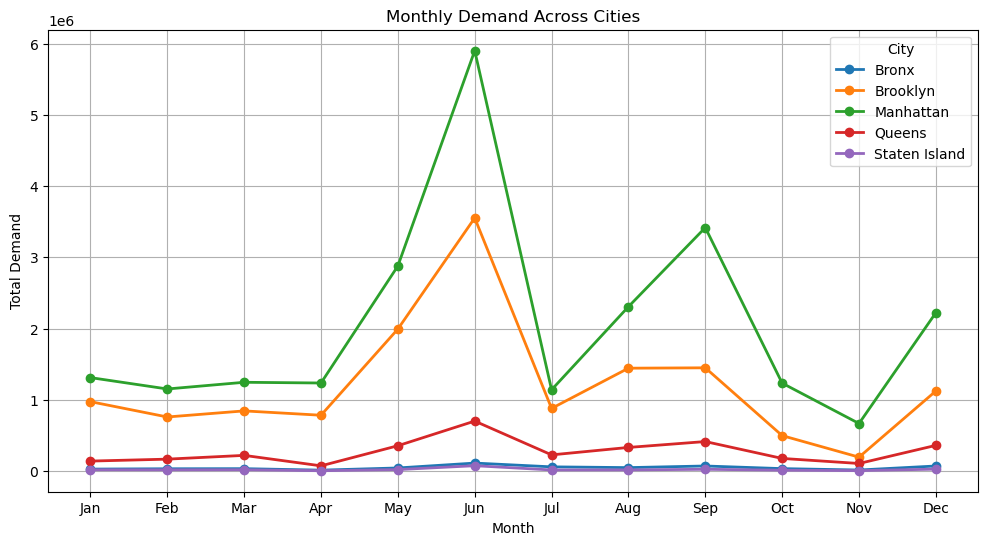

In [205]:
demand_data = data.groupby(['month', 'city'])[['flight_price', 'stay_price']].sum().reset_index()

demand_data['total_demand'] = demand_data['flight_price'] + demand_data['stay_price']

plt.figure(figsize=(12, 6))


for city in demand_data['city'].unique():
    city_data = demand_data[demand_data['city'] == city]
    plt.plot(city_data['month'], city_data['total_demand'], label=city, marker='o', linewidth=2)

plt.title('Monthly Demand Across Cities')
plt.xlabel('Month')
plt.ylabel('Total Demand')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='City')
plt.grid(True)
plt.show()

In [213]:
data.to_csv("Clean_airline_dataset.csv", index=False)
print("DataFrame saved as Clean_airline_dataset.csv")

DataFrame saved as Clean_airline_dataset.csv
